# Analyzing fluorescent images with OpenCV in Python

Some more text

In [1]:
%matplotlib inline
# import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def make_hsv(x):
    return cv2.cvtColor(x,cv2.COLOR_BGR2HSV)

In [3]:
image = cv2.imread("test_red.jpg")

# crop to exlude scale bar
width, length, _ = image.shape
image = image[:int(width*0.9), :]

print("dimensions of image: {}".format(image.shape))

dimensions of image: (468, 692, 3)


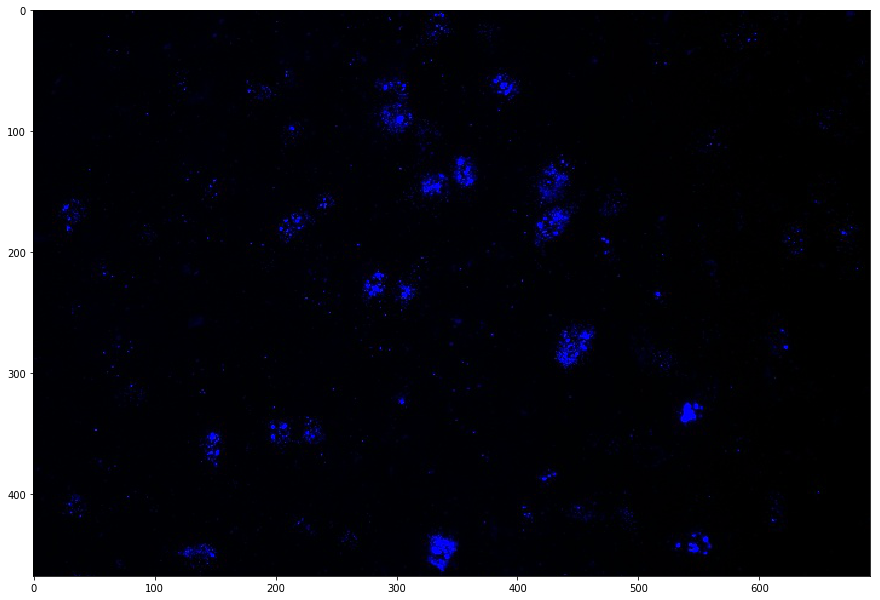

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

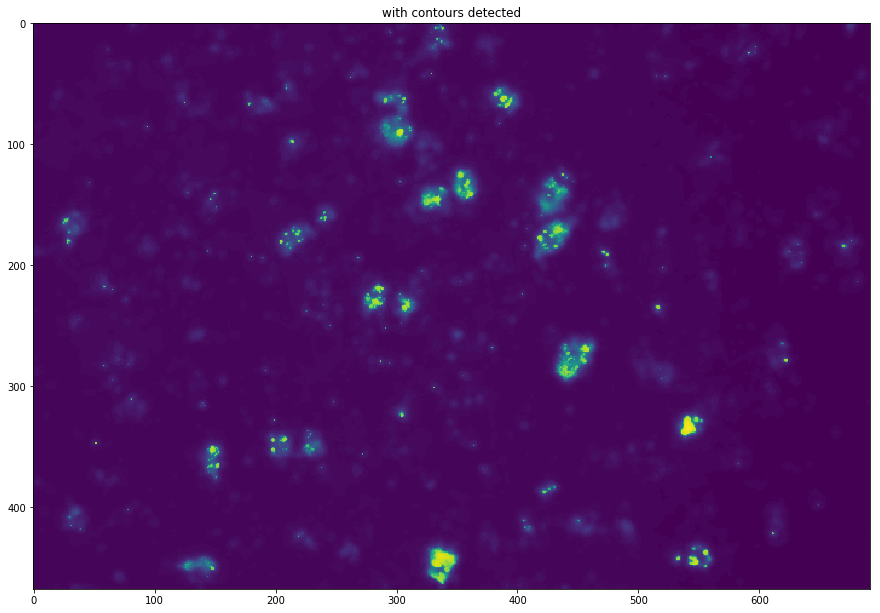

In [9]:
# blur
# blur = cv2.blur(image,(10,10))
blur = cv2.bilateralFilter(image ,9,75,75)

# convert to HSV
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(gray)
plt.title("with contours detected")

plt.show()

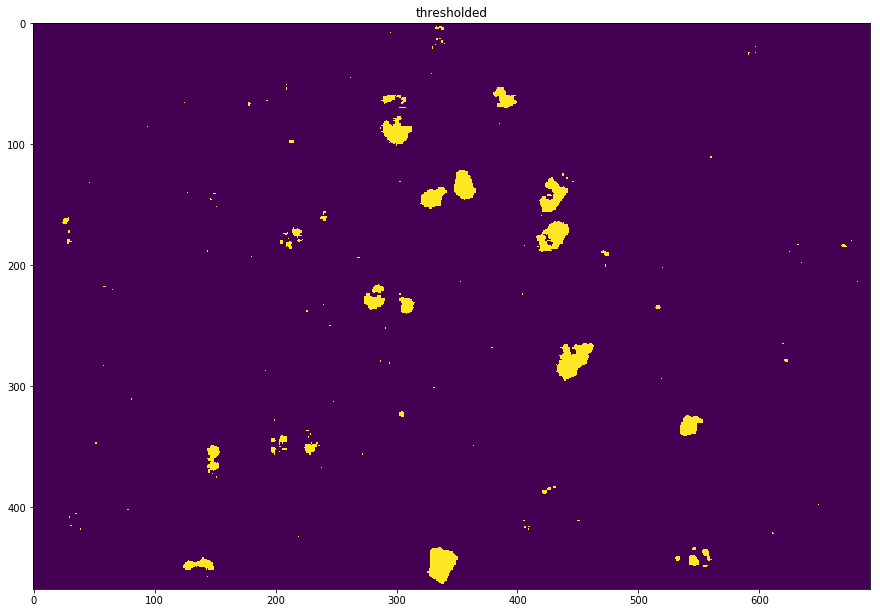

In [10]:
ret,thresh = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)

plt.figure(figsize=(15,15))
plt.title("thresholded")
plt.imshow(thresh)
plt.show()

28, 139


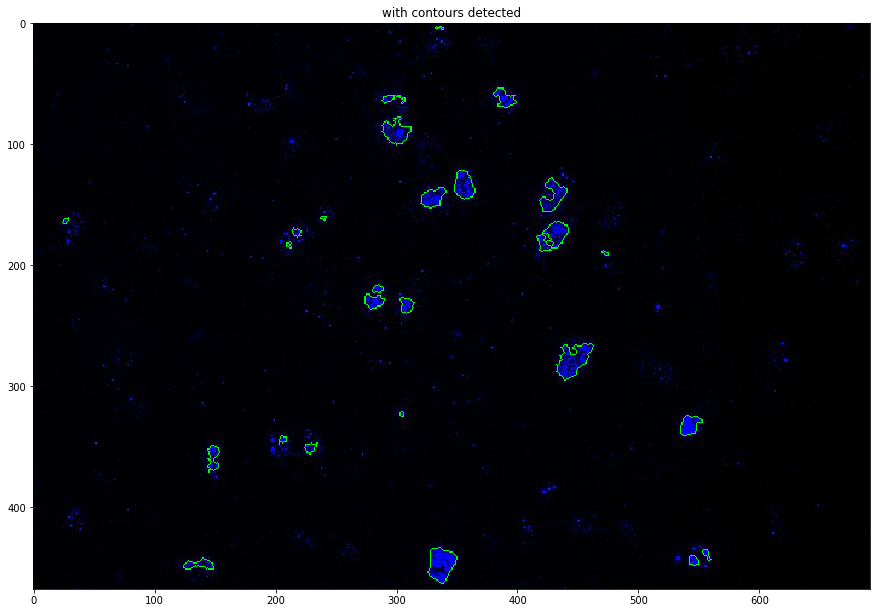

In [11]:
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# sizes = []
# for c in contours:
#     sizes.append(cv2.contourArea(c))
# print(sizes)

big_countours = [c for c in contours if cv2.contourArea(c) > 10]

print("{}, {}".format(len(big_countours), len(contours)))

cv2.drawContours(image, big_countours, -1, (0,255,0), 1)

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.title("with contours detected")
plt.show()

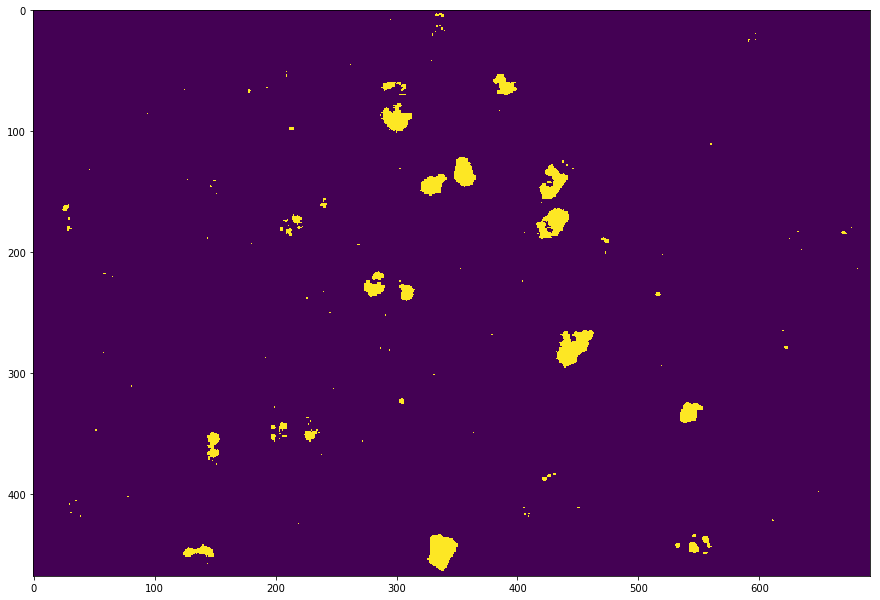

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(thresh)
plt.show()

thresh[:5,:5]

## look at green image

28, 139


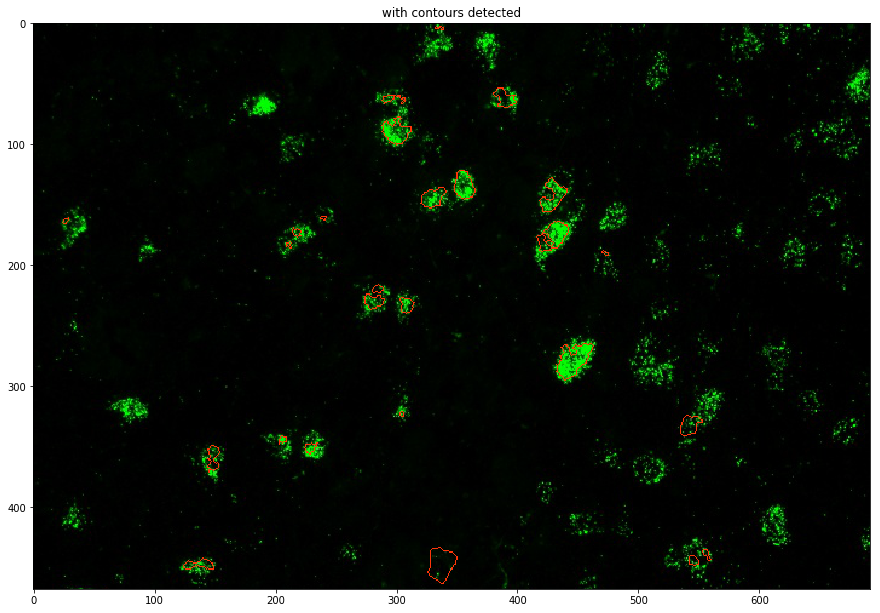

In [13]:
image = cv2.imread("test_green.jpg")

# crop to exlude scale bar
width, length, _ = image.shape
image = image[:int(width*0.9), :]

blur = cv2.bilateralFilter(image ,9,75,75)

gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

ret,thresh2 = cv2.threshold(gray,20,255,cv2.THRESH_BINARY)

_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# sizes = []
# for c in contours:
#     sizes.append(cv2.contourArea(c))
# print(sizes)

big_countours = [c for c in contours if cv2.contourArea(c) > 10]

print("{}, {}".format(len(big_countours), len(contours)))

cv2.drawContours(image, big_countours, -1, (255,54,10), 1)

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.title("with contours detected")
plt.show()

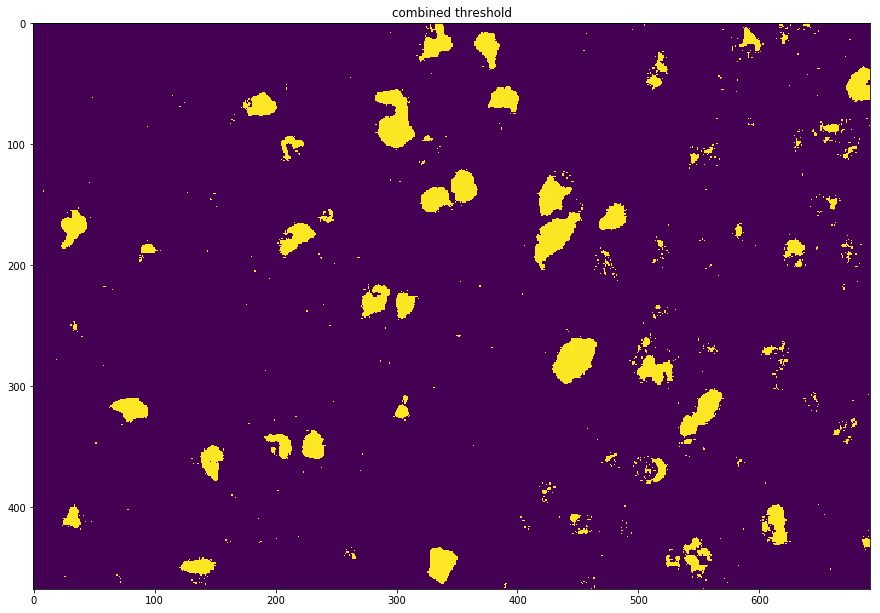

In [14]:
thresh_combined = thresh + thresh2

plt.figure(figsize=(15,15))
plt.imshow(thresh_combined)
plt.title("combined threshold")
plt.show()

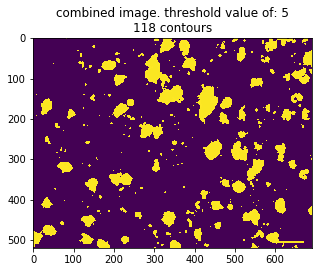

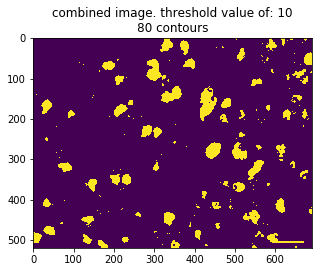

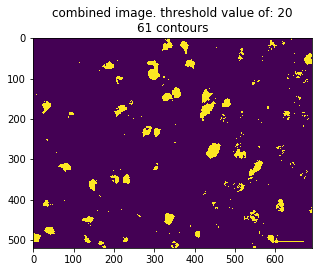

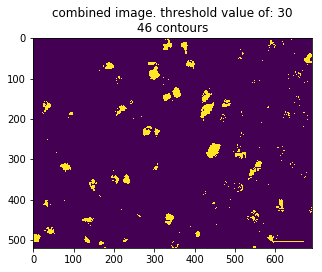

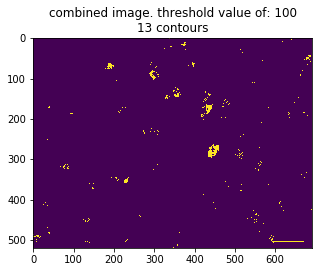

In [15]:
def threshold(x, threshold_parameter = 20):
    
    # crop to exlude scale bar
#     width, length, _ = x.shape
#     x = x[:int(width*0.9), :]

    blur = cv2.bilateralFilter(x, 9 ,75 ,75)

    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

    ret, thresh = cv2.threshold(gray,threshold_parameter,255,cv2.THRESH_BINARY)

#     big_countours = [c for c in contours if cv2.contourArea(c) > min_size]

#     cv2.drawContours(image, big_countours, -1, (255,54,10), 1)

    return thresh



thresholds = [5, 10, 20, 30, 100]

image1 = cv2.imread("test_green.jpg")
image2 = cv2.imread("test_red.jpg")

for thresh in thresholds:
    thresh1 = threshold(image1, threshold_parameter = thresh)
    thresh2 = threshold(image2, threshold_parameter = thresh)
    
    thresh_combined = thresh2 + thresh1
    
    _, contours, hierarchy = cv2.findContours(thresh_combined, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    big_countours = [c for c in contours if cv2.contourArea(c) > 20]    
    
    plt.figure(figsize = (5,5))
    plt.imshow(thresh_combined)
    plt.title("combined image. threshold value of: {}\n{} contours".format(thresh, len(big_countours)))
    plt.show()

Based on this, I'm going to use a threshold value of 10 when thresholding the photos. The combined image might make a nice map that we can layer onto each of the original photos.

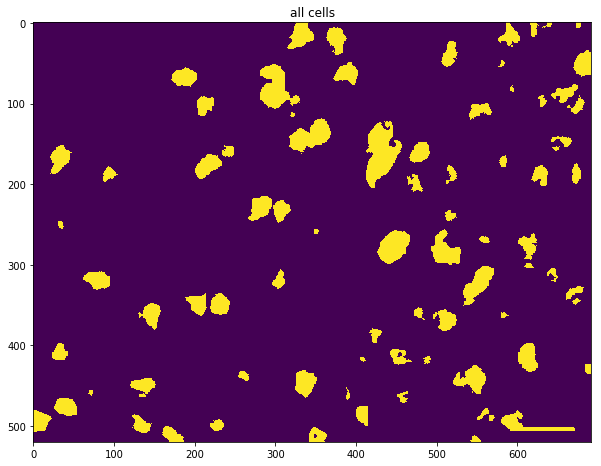

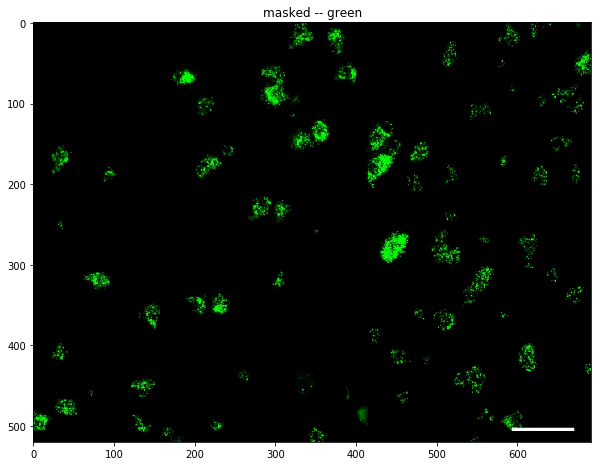

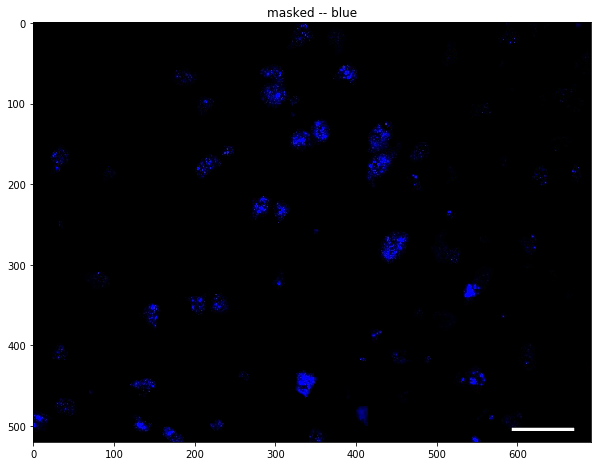

In [61]:
image1 = cv2.imread("test_green.jpg")
image2 = cv2.imread("test_red.jpg")

thresh1 = threshold(image1, threshold_parameter = 10)
thresh2 = threshold(image2, threshold_parameter = 10)

# combine
thresh_combined = thresh2 + thresh1

# get contours from the combined images to define cells
# create blank image
mask = np.zeros(thresh_combined.shape, np.uint8)
# get contours
_, contours, hierarchy = cv2.findContours(thresh_combined.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# exclude tiny contours
big_countours = [c for c in contours if cv2.contourArea(c) > 15]
# draw onto mask
cv2.drawContours(mask, big_countours, -1, (255), -1)

# mask = cv2.bitwise_not(thresh_combined)
res2 = cv2.bitwise_and(image2, image2, mask = mask)
res1 = cv2.bitwise_and(image1, image1, mask = mask)

plt.figure(figsize = (10,10))
plt.imshow(mask)
plt.title("all cells")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(res1)
plt.title("masked -- green")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(res2)
plt.title("masked -- blue")
plt.show()

In [151]:
# store list of contours from the combined image
## already in big contours

def get_images(x, threshold_parameter = 20):
    blur = cv2.bilateralFilter(x, 9 ,75 ,75)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,threshold_parameter,255,cv2.THRESH_BINARY)
    return gray, thresh


# apply to image 1
# for each contour, get the average intensity
image1_intensity = []
image2_intensity = []

print("number of contours: {}".format(len(big_countours)))

image1= cv2.imread("test_red.jpg")
image1_copy = image1.copy()
image2 = cv2.imread("test_green.jpg")
image2_copy = image2.copy()

cats = []

for i in range(len(big_countours)):
    # read in images
    gray1, mask1 = get_images(image1)
    gray2, mask2 = get_images(image2)
    
    temp1_1 = np.zeros(image1.shape,np.uint8)
    temp1_2 = np.zeros(gray1.shape,np.uint8)
    temp2_1 = np.zeros(image2.shape,np.uint8)
    temp2_2 = np.zeros(gray2.shape,np.uint8)
    
    cv2.drawContours(temp1_2, big_countours, i, 255, -1)
    cv2.drawContours(temp1_2, big_countours, i, cv2.mean(image1, temp1_2),-1)    
    cv2.drawContours(temp2_2, big_countours, i, 255, -1)
    cv2.drawContours(temp2_2, big_countours, i, cv2.mean(image2, temp2_2),-1)
    
    image1_intensity.append(cv2.mean(image1, temp1_2))
    image2_intensity.append(cv2.mean(image2, temp2_2))    
    
    blue_intensity = cv2.mean(image1, temp1_2)[0]
    green_intensity =  cv2.mean(image2, temp2_2)[1]
    
    M = cv2.moments(big_countours[i])
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.putText(image1,"{}".format(round(blue_intensity,1)), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 0.33, 255)
    cv2.putText(image2,"{}".format(round(green_intensity,1)), (cx,cy), cv2.FONT_HERSHEY_SIMPLEX, 0.33, 255)

    
    if blue_intensity >= 3 and green_intensity >= 30:
        cats.append("colocation")
    elif blue_intensity >= 3 and green_intensity < 30:
        cats.append("blue")
    elif blue_intensity < 3 and green_intensity > 30:
        cats.append("green")


# cats = []
# for blue, green in zip(blue_list, green_list):
#     if blue >= 10 and green >= 10:
#         cats.append("coexpression")
#     elif blue > 10 and green < 10:
#         cats.append("blue_expression")
#     elif blue < 10 and green >= 10:
#         cats.append("green_expression")

number of contours: 83


NameError: name 'y' is not defined

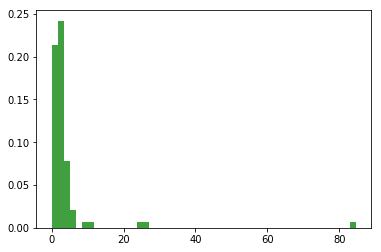

In [152]:
blue= []
for x in image1_intensity:
    blue.append(x[0])

n, bins, patches = plt.hist(blue, 50, normed=1, facecolor='green', alpha=0.75)

l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title("distribution of blue in the cells")
plt.show()

[22.666666666666668, 47.60567823343849, 6.566666666666666, 22.95639534883721, 61.22099447513812, 58.3469387755102, 55.0, 118.41509433962264, 99.33480176211454, 45.956043956043956, 49.74576271186441, 72.352, 51.75, 40.888888888888886, 43.714285714285715, 38.297872340425535, 67.0, 42.43589743589744, 9.486153846153845, 48.30855018587361, 56.92045454545455, 0.0, 27.43859649122807, 43.086687306501545, 10.048780487804878, 68.44992295839754, 56.73287671232877, 33.15568862275449, 58.883720930232556, 51.515592515592516, 49.829268292682926, 64.43761996161228, 53.43478260869565, 92.35496957403652, 61.24122807017544, 49.58469945355191, 89.39169675090253, 63.270270270270274, 44.39090909090909, 56.00625651720542, 42.674418604651166, 45.956043956043956, 38.03695150115473, 137.8334771354616, 56.791449426485926, 36.27777777777778, 52.88461538461539, 36.48031496062992, 65.92481203007519, 63.327302631578945, 38.057377049180324, 59.65686274509804, 52.02770083102493, 43.331288343558285, 41.886138613861384,

NameError: name 'y' is not defined

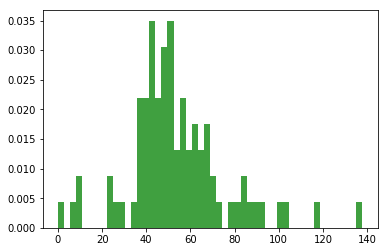

In [153]:


green= []
for x in image2_intensity:
    green.append(x[1])
n, bins, patches = plt.hist(green, 50, normed=1, facecolor='green', alpha=0.75)
print(green)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.title("distribution of green in the cells")
plt.show()


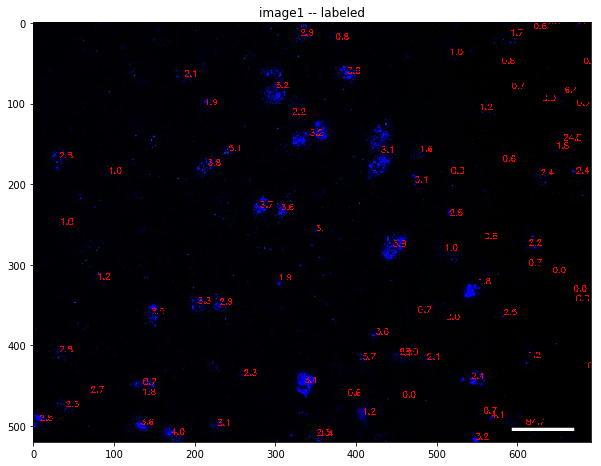

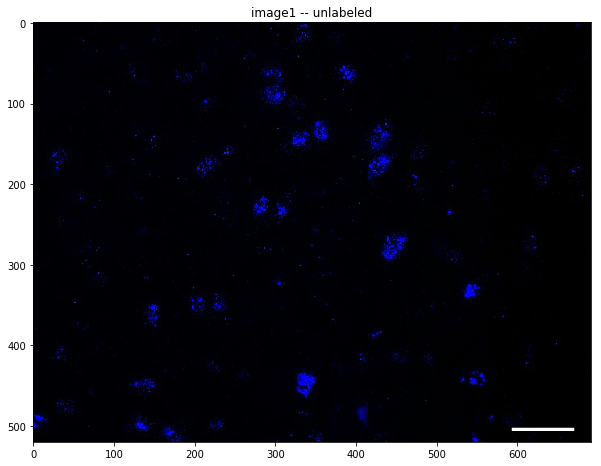

In [154]:

plt.figure(figsize = (10,10))
plt.imshow(image1)
plt.title("image1 -- labeled")
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(image1_copy)
plt.title("image1 -- unlabeled")
plt.show()

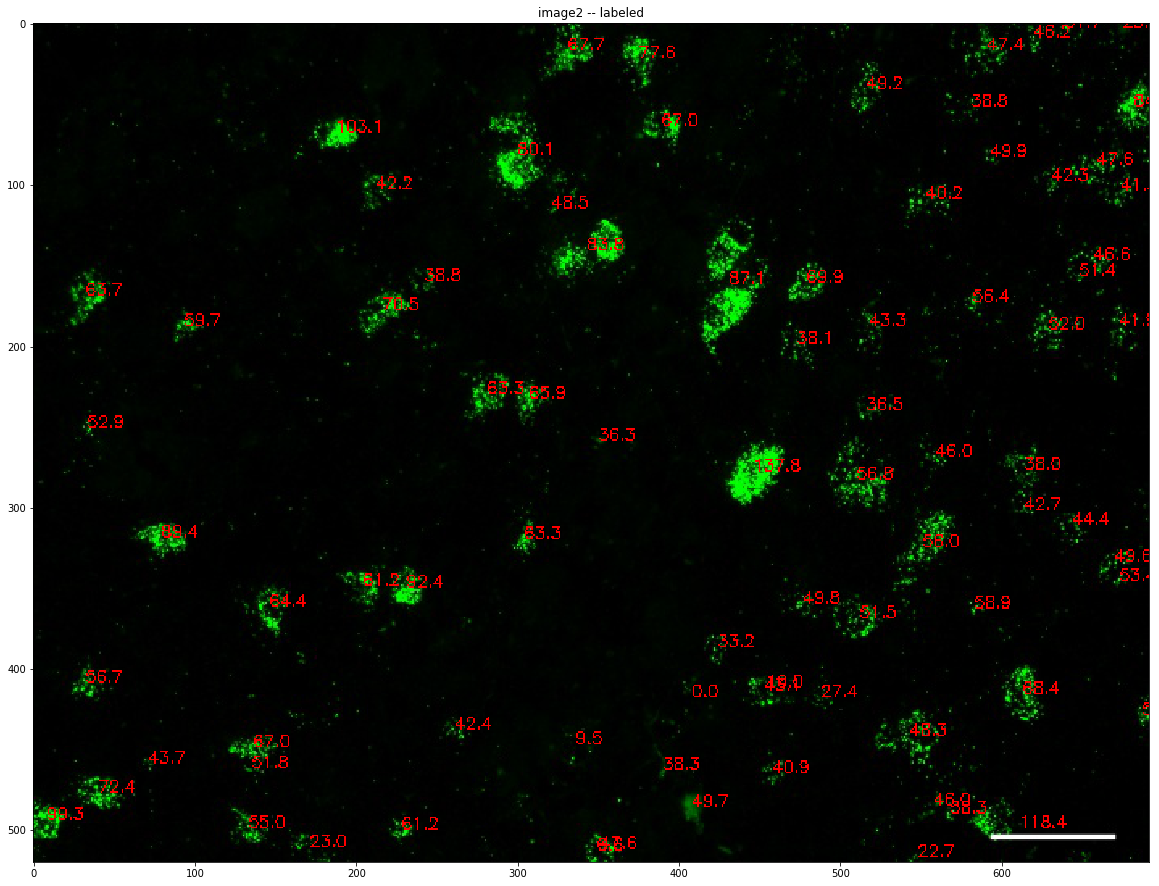

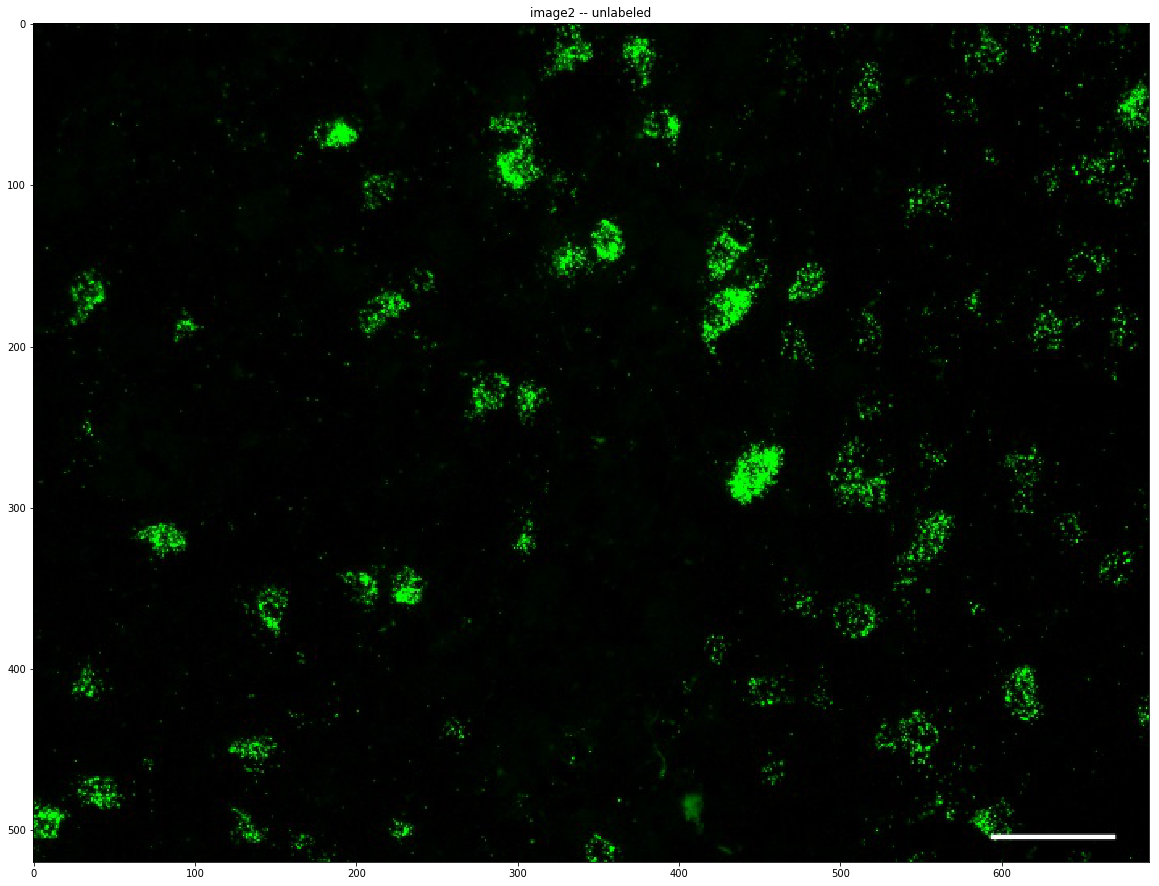

In [155]:

plt.figure(figsize = (20,20))
plt.imshow(image2)
plt.title("image2 -- labeled")
plt.show()

plt.figure(figsize = (20,20))
plt.imshow(image2_copy)
plt.title("image2 -- unlabeled")
plt.show()

In [156]:
import pandas as pd

s = pd.Series(cats, dtype="category")

s.value_counts()

green         54
colocation    21
blue           6
dtype: int64